# Homework

# 1. Solve classification problem using 'classification.csv' dataset

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pd.read_csv("classification.csv").head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


#### visualise the data, do some EDA

In [20]:
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("classification.csv")
y = df["default"].to_numpy()

Text(619.9949494949494, 0.5, 'Debtinc')

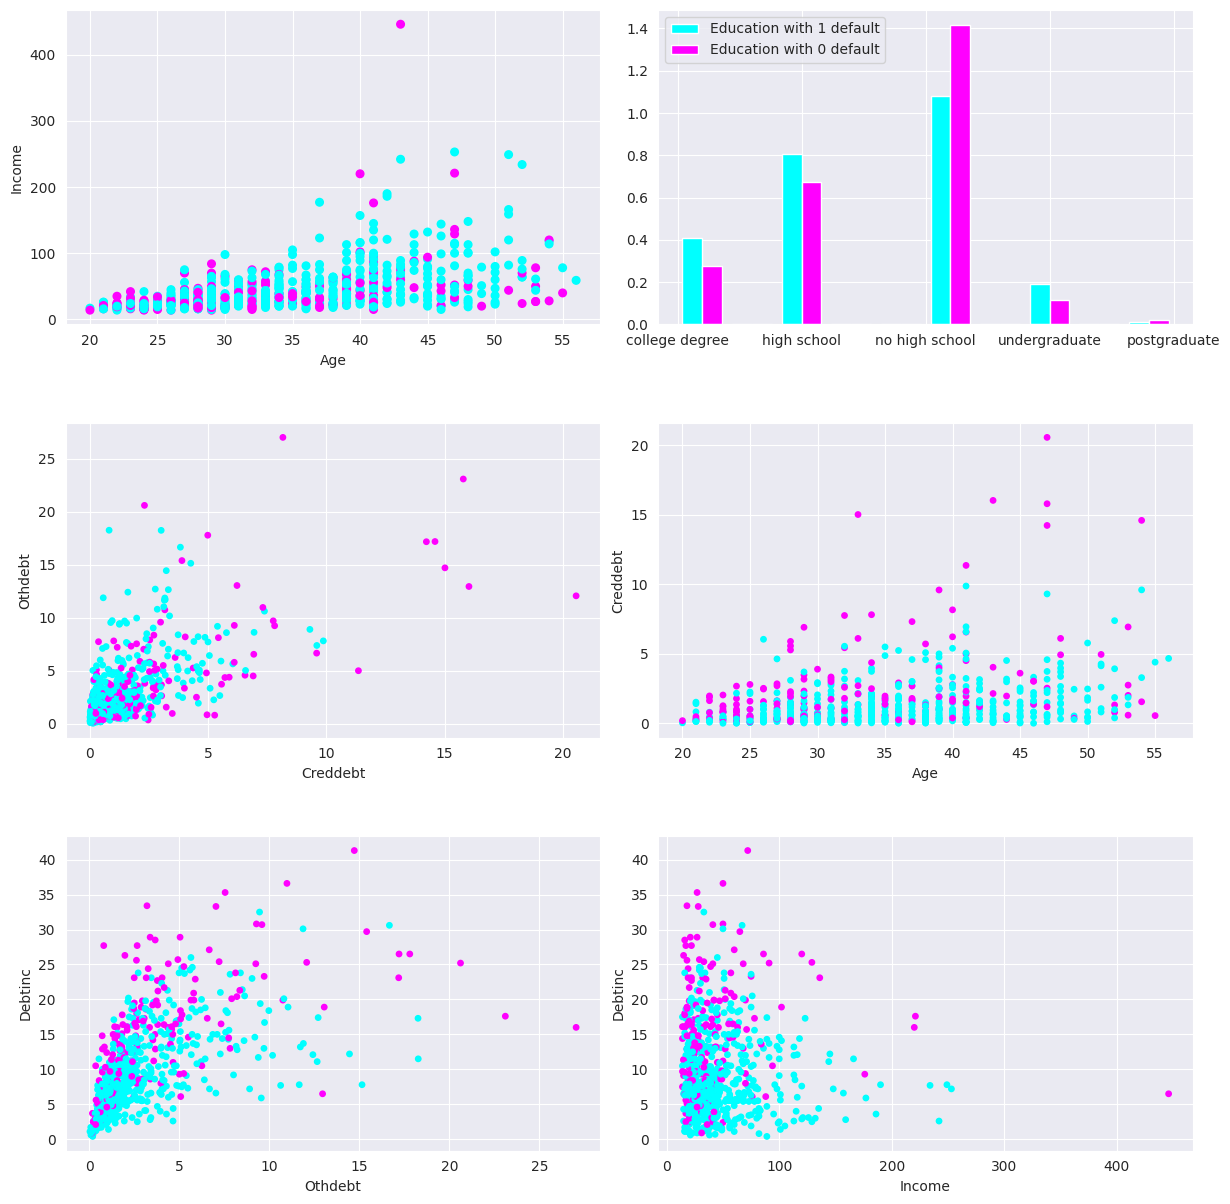

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
fig.tight_layout(h_pad=5)

ax[0][0].scatter(
    df["age"], df["income"], c=["magenta" if i else "cyan" for i in y], s=30
)
ax[0][0].set_xlabel("Age")
ax[0][0].set_ylabel("Income")

ax[0][1].hist(
    [df[df["default"] == 1]["ed"], df[df["default"] == 0]["ed"]],
    bins=10,
    density=True,
    histtype="bar",
    color=["cyan", "magenta"],
)
ax[0][1].legend(["Education with 1 default", "Education with 0 default"])

ax[1][0].scatter(
    df["creddebt"], df["othdebt"], c=["magenta" if i else "cyan" for i in y], s=15
)
ax[1][0].set_xlabel("Creddebt")
ax[1][0].set_ylabel("Othdebt")

ax[1][1].scatter(
    df["age"], df["creddebt"], c=["magenta" if i else "cyan" for i in y], s=15
)
ax[1][1].set_xlabel("Age")
ax[1][1].set_ylabel("Creddebt")

ax[2][0].scatter(
    df["othdebt"], df["debtinc"], c=["magenta" if i else "cyan" for i in y], s=15
)
ax[2][0].set_xlabel("Othdebt")
ax[2][0].set_ylabel("Debtinc")

ax[2][1].scatter(
    df["income"], df["debtinc"], c=["magenta" if i else "cyan" for i in y], s=15
)
ax[2][1].set_xlabel("Income")
ax[2][1].set_ylabel("Debtinc")

##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [23]:
X = df.drop(["employ", "address", "default"], axis=1)

In [24]:
X.head(5)

,age,ed,income,debtinc,creddebt,othdebt
0,41,college degree,176,9.3,11.359392,5.008608
1,27,no high school,31,17.3,1.362202,4.000798
2,40,no high school,55,5.5,0.856075,2.168925
3,41,no high school,120,2.9,2.658720,0.821280
4,24,high school,28,17.3,1.787436,3.056564


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=78)

In [26]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [27]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
cat_cols = X_train.select_dtypes(include="object").columns
ohe_cat_cols = ohe.fit(X_train[cat_cols])


def ohe_X(_X, cat_cols):
    _X[ohe.get_feature_names_out()] = ohe.transform(_X[cat_cols])
    _X.drop(cat_cols, axis=1, inplace=True)


ohe_X(X_train, cat_cols)
X_train.to_numpy()
ohe_X(X_val, cat_cols)
X_val.to_numpy()

array([[2.900000e+01, 1.900000e+01, 6.300000e+00, 6.810930e-01,
        5.159070e-01, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.300000e+01, 5.500000e+01, 7.000000e+00, 2.159850e+00,
        1.690150e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.100000e+01, 4.400000e+01, 1.320000e+01, 4.960032e+00,
        8.479680e-01, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.900000e+01, 5.200000e+01, 3.200000e+00, 1.154816e+00,
        5.091840e-01, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.800000e+01, 2.900000e+01, 1.330000e+01, 2.148349e+00,
        1.708651e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.300000e+01, 2.200000e+01, 1.140000e+01, 1.274064e+00,
        1.233936e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.

In [28]:
norm = MinMaxScaler()
norm.fit(X_train)

X_train = norm.transform(X_train)
X_val = norm.transform(X_val)

# 2. Print accuracy, confusion matrix, precision and recall on train and test (and maybe validation) datasets.

##### do not use any libraries for metrics, implement yourself

In [29]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_val)

TN = FN = FP = TP = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_val[i]:
        if y_pred[i] == 0:
            TN += 1
        else:
            TP += 1
    else:
        if y_pred[i] == 0:
            FN += 1
        else:
            FP += 1

my_confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
print("My confusion_matrix:", my_confusion_matrix)
print("Sklearn's confusion_matrix:", confusion_matrix(y_val, y_pred))

accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

print("My vs sklearn accuracy:", accuracy, accuracy_score(y_val, y_pred))
print("My vs sklearn recall:", recall, recall_score(y_val, y_pred))
print("My vs sklearn precision:", precision, precision_score(y_val, y_pred))

My confusion_matrix: [[24  1]
 [ 8  2]]
Sklearn's confusion_matrix: [[24  1]
 [ 8  2]]
My vs sklearn accuracy: 0.7428571428571429 0.7428571428571429
My vs sklearn recall: 0.2 0.2
My vs sklearn precision: 0.6666666666666666 0.6666666666666666
